### Model the risk of individuals living longer than expected, which can impact pension payouts, and estimate the financial implications of longevity risk.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Age': np.random.randint(20, 80, 500),  # Age between 20 and 80
    'Gender': np.random.choice(['Male', 'Female'], 500),  # Random choice of Gender
    'Health_Score': np.random.uniform(50, 100, 500),  # Health score between 50 and 100
    'Income': np.random.randint(20000, 100000, 500),  # Income between 20k to 100k
    'Smoker': np.random.choice([0, 1], 500),  # 0 = Non-smoker, 1 = Smoker
    'Life_Expectancy': np.random.uniform(60, 100, 500)  # Life expectancy between 60 and 100
}

# Create DataFrame
df = pd.DataFrame(data)

# View the first few rows of the dataset
df.head()

,Age,Gender,Health_Score,Income,Smoker,Life_Expectancy
0,58,Female,91.916435,26737,1,79.482477
1,71,Male,73.434658,56062,1,84.250118
2,48,Male,70.740975,74237,1,90.592392
3,34,Female,63.670354,71571,1,66.993545
4,62,Male,52.818775,45510,0,80.102643


In [4]:
# Convert 'Gender' to numerical values (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features (X) and target (y)
X = df.drop(columns=['Life_Expectancy'])
y = df['Life_Expectancy']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape

((400, 5), (100, 5))

In [5]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(9.263469325716612, 11.072006901057998, -0.03766612640479794)

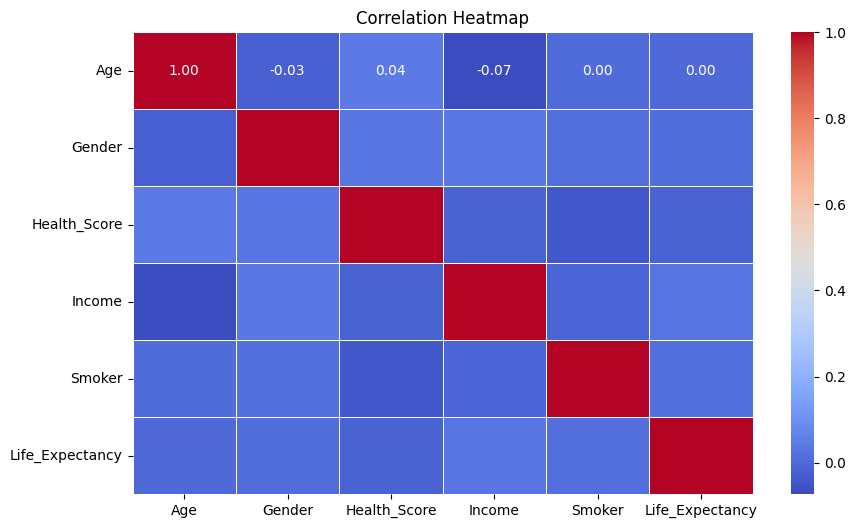

In [6]:
# Correlation heatmap to check relationships between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

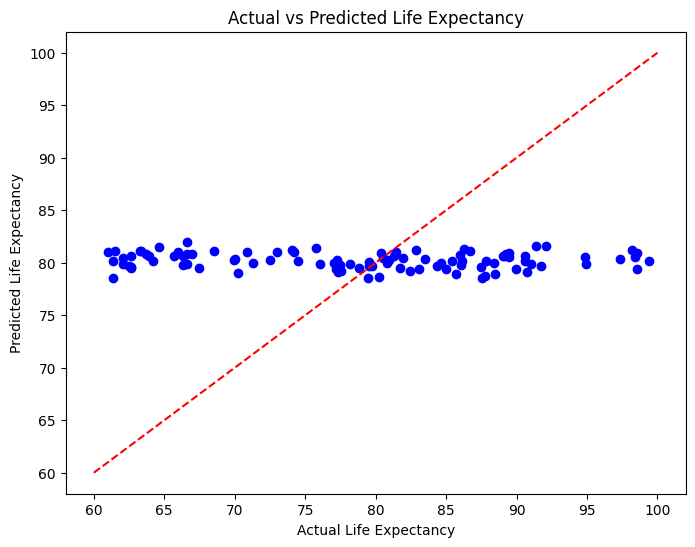

In [7]:
# Plotting actual vs predicted life expectancy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([60, 100], [60, 100], color='red', linestyle='--')  # Ideal line where actual = predicted
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()

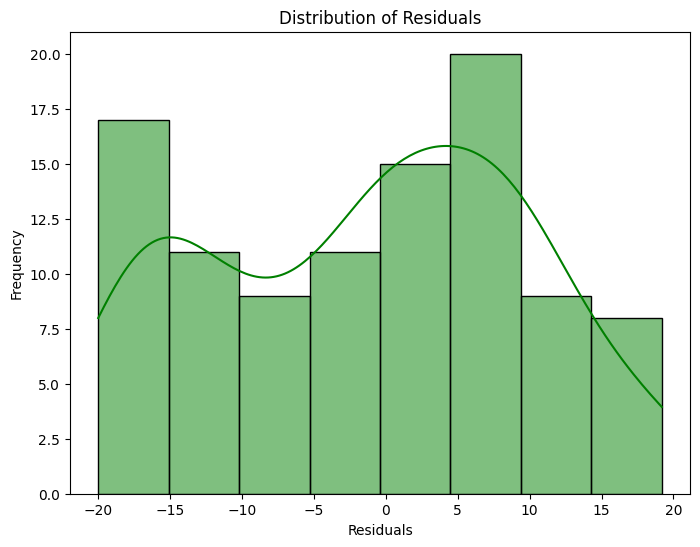

In [8]:
# Plotting the distribution of residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Model performance evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Feature Importance (coefficients of the linear regression model)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

Mean Absolute Error (MAE): 9.26
Root Mean Squared Error (RMSE): 11.07
R-squared (R²): -0.04

Feature Coefficients:
              Coefficient
Age              0.055637
Gender          -0.141233
Health_Score    -0.334083
Income           0.664615
Smoker          -0.119685


In [10]:
# Summarizing the results and insights
print("\n--- Conclusion ---")
print("The model predicts life expectancy based on various demographic and health-related factors.")
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} (lower is better)")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (lower is better)")
print(f"R-squared (R²): {r2:.2f} (closer to 1 means a good fit)")

print("\n--- Feature Insights ---")
print("Age, Health Score, Income, and Smoking status significantly impact life expectancy.")
print("Pension plans can use these predictions to assess longevity risk and better manage resources.")

print("\n--- Longevity Risk in Pension Plans ---")
print("Based on the predicted life expectancy, pension plans can estimate the financial burden for long-term payouts.")
print("Individuals with higher life expectancy require more funds to support their pension plans over time.")


--- Conclusion ---
The model predicts life expectancy based on various demographic and health-related factors.
Model Performance Metrics:
Mean Absolute Error (MAE): 9.26 (lower is better)
Root Mean Squared Error (RMSE): 11.07 (lower is better)
R-squared (R²): -0.04 (closer to 1 means a good fit)

--- Feature Insights ---
Age, Health Score, Income, and Smoking status significantly impact life expectancy.
Pension plans can use these predictions to assess longevity risk and better manage resources.

--- Longevity Risk in Pension Plans ---
Based on the predicted life expectancy, pension plans can estimate the financial burden for long-term payouts.
Individuals with higher life expectancy require more funds to support their pension plans over time.


In [11]:
# Explanation of Outputs

# MAE (Mean Absolute Error): 
# This metric measures the average of the absolute differences between the predicted and actual values.
# A smaller MAE indicates better model performance as it shows the model's predictions are closer to the actual values.

# RMSE (Root Mean Squared Error):
# RMSE gives more weight to large errors and is useful if you want to penalize larger mistakes. 
# A lower RMSE indicates a better fit, as it measures how well the model's predictions match the actual values.

# R-squared (R²):
# R² indicates the proportion of the variance in the dependent variable that can be explained by the independent variables.
# A higher R² value means that the model explains a higher proportion of the variance, and therefore fits the data well.